# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1492
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INPUT0    1492 non-null   float64
 1   INPUT1    1492 non-null   float64
 2   INPUT2    1492 non-null   float64
 3   INPUT3    1492 non-null   float64
 4   INPUT4    1492 non-null   float64
 5   INPUT5    1492 non-null   float64
 6   INPUT6    1492 non-null   float64
 7   INPUT7    1492 non-null   float64
 8   INPUT8    1492 non-null   float64
 9   TARGET_X  1492 non-null   float64
 10  TARGET_Y  1492 non-null   float64
dtypes: float64(11)
memory usage: 139.9 KB


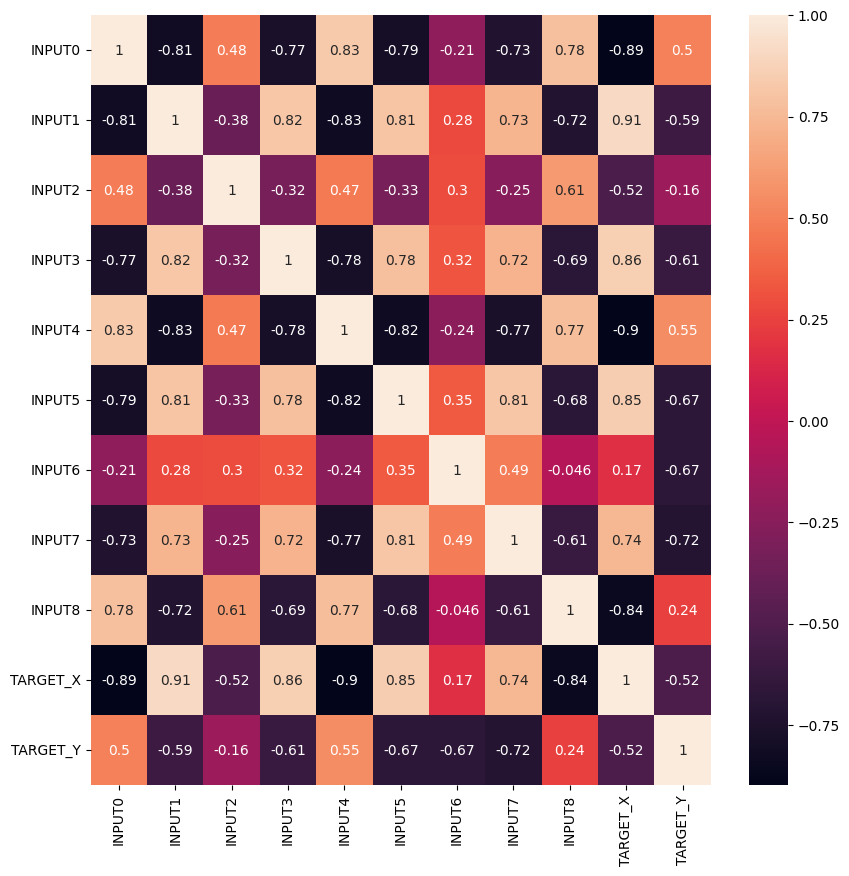

x_train  (1044, 9)
y_train  (1044, 2)
x_test  (448, 9)
y_test  (448, 2)


In [2]:
from set_extraction import x_train, y_train, x_test, y_test

# Models

In [3]:
from sklearn.metrics import make_scorer
from sklearn import tree

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [4]:
def MEE(actual, predict):

    return np.mean(np.linalg.norm(actual - predict, axis=1))
    

In [5]:
results = []

# Tree

## DecisionTreeRegressor

### Grid search for parameter setting 


In [6]:
#params

In [7]:
params = { 
     #'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
     'splitter' : ['best', 'random'],
     'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
     'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005],
     'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
}

In [8]:
# ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

In [9]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

dt_search = DecisionTreeRegressor(random_state=42) 

dt_cv = GridSearchCV(estimator=dt_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                     cv=5, verbose=4, n_jobs=n_jobs_search) 
dt_cv.fit(x_train, y_train)

Fitting 5 folds for each of 72576 candidates, totalling 362880 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005,
                                       0.0001, 0.0005],
                         'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05,
                                                      0.001, 0.005, 0.0001,
                                                      0.0005],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [10]:
dt_cv.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [11]:
# validation
dt_cv.best_score_

-1.7264068184067014

In [12]:
# save the model to disk
joblib.dump(dt_cv.best_estimator_, 'cup_models/dt.z')

['cup_models/dt.z']

### Best model

In [13]:
dec_tree = joblib.load('cup_models/dt.z')

In [14]:
dec_tree

DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, random_state=42)

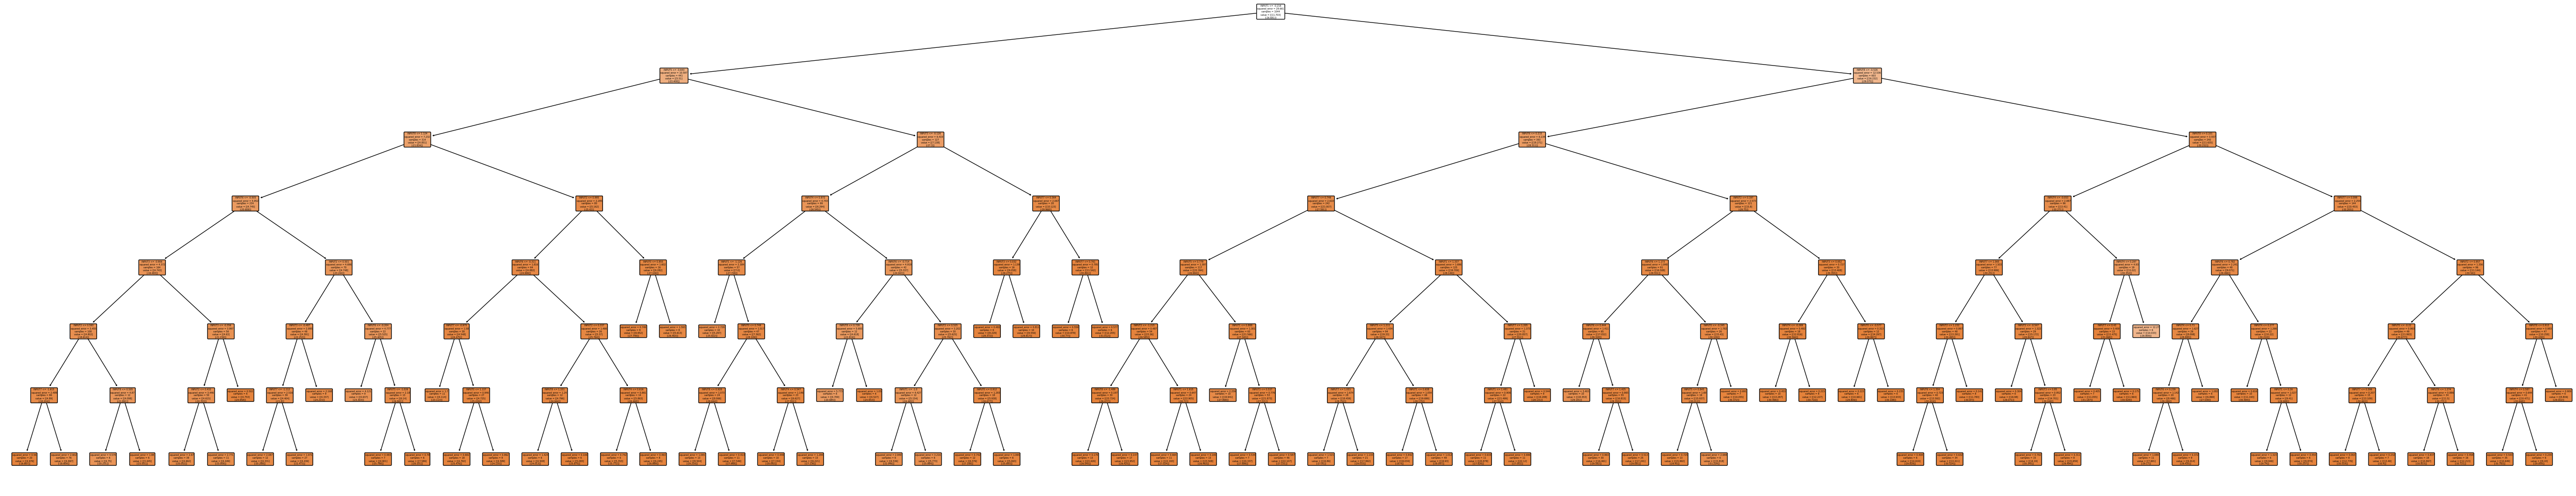

In [15]:
plt.figure(figsize=(50, 10))
tree.plot_tree(dec_tree, 
               filled=True, rounded=True, 
               feature_names = ["INPUT0", "INPUT1", "INPUT2", "INPUT3", "INPUT4", "INPUT5", "INPUT6", "INPUT7", "INPUT8"])
plt.show()

In [16]:
train_pred_dt = dec_tree.predict(x_train)

In [17]:
print('MEE train set ', MEE(y_train, train_pred_dt))

MEE train set  1.1847934538584666


In [18]:
test_pred_dt = dec_tree.predict(x_test)

In [19]:
print('MEE test set ', MEE(y_test, test_pred_dt))

MEE test set  1.8216426811717366


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

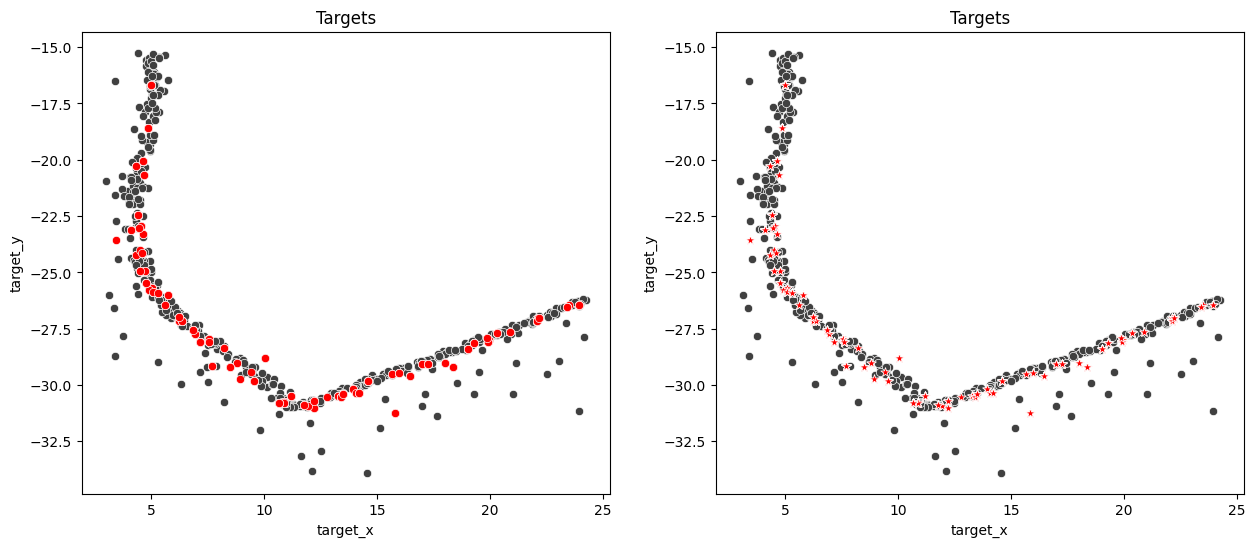

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_dt[:,0],y=test_pred_dt[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_dt[:,0],y=test_pred_dt[:,1],color='r',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

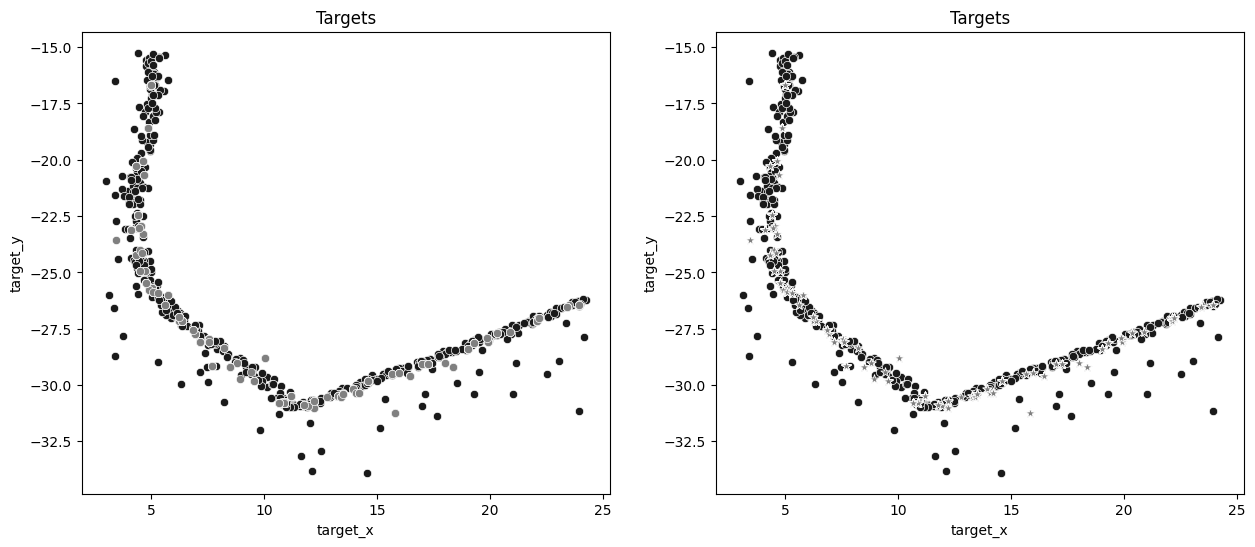

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_dt[:,0],y=test_pred_dt[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_dt[:,0],y=test_pred_dt[:,1],color='.5',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [22]:
results.append(('DecisionTreeRegressor train ', MEE(y_train, train_pred_dt)))
results.append(('DecisionTreeRegressor validation ', dt_cv.best_score_))

## ExtraTreeRegressor

### Grid search for parameter setting 


In [23]:
#params

In [24]:
params = { 
     #'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
     'splitter' : ['best', 'random'],
     'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
     'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005],
     'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
}

In [25]:
# ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

In [26]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

et_search = ExtraTreeRegressor(random_state=42) 

et_cv = GridSearchCV(estimator=et_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                     cv=5, verbose=4, n_jobs=n_jobs_search) 
et_cv.fit(x_train, y_train)

Fitting 5 folds for each of 72576 candidates, totalling 362880 fits


GridSearchCV(cv=5, estimator=ExtraTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005,
                                       0.0001, 0.0005],
                         'max_depth': [5, 7, 10, 15, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.5, 0.01, 0.05,
                                                      0.001, 0.005, 0.0001,
                                                      0.0005],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [27]:
et_cv.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [28]:
# validation
et_cv.best_score_

-1.7264068184067014

In [29]:
# save the model to disk
joblib.dump(et_cv.best_estimator_, 'cup_models/et.z')

['cup_models/et.z']

### Best model

In [30]:
e_tree = joblib.load('cup_models/et.z')

In [31]:
e_tree

ExtraTreeRegressor(max_depth=7, min_samples_leaf=6, random_state=42,
                   splitter='best')

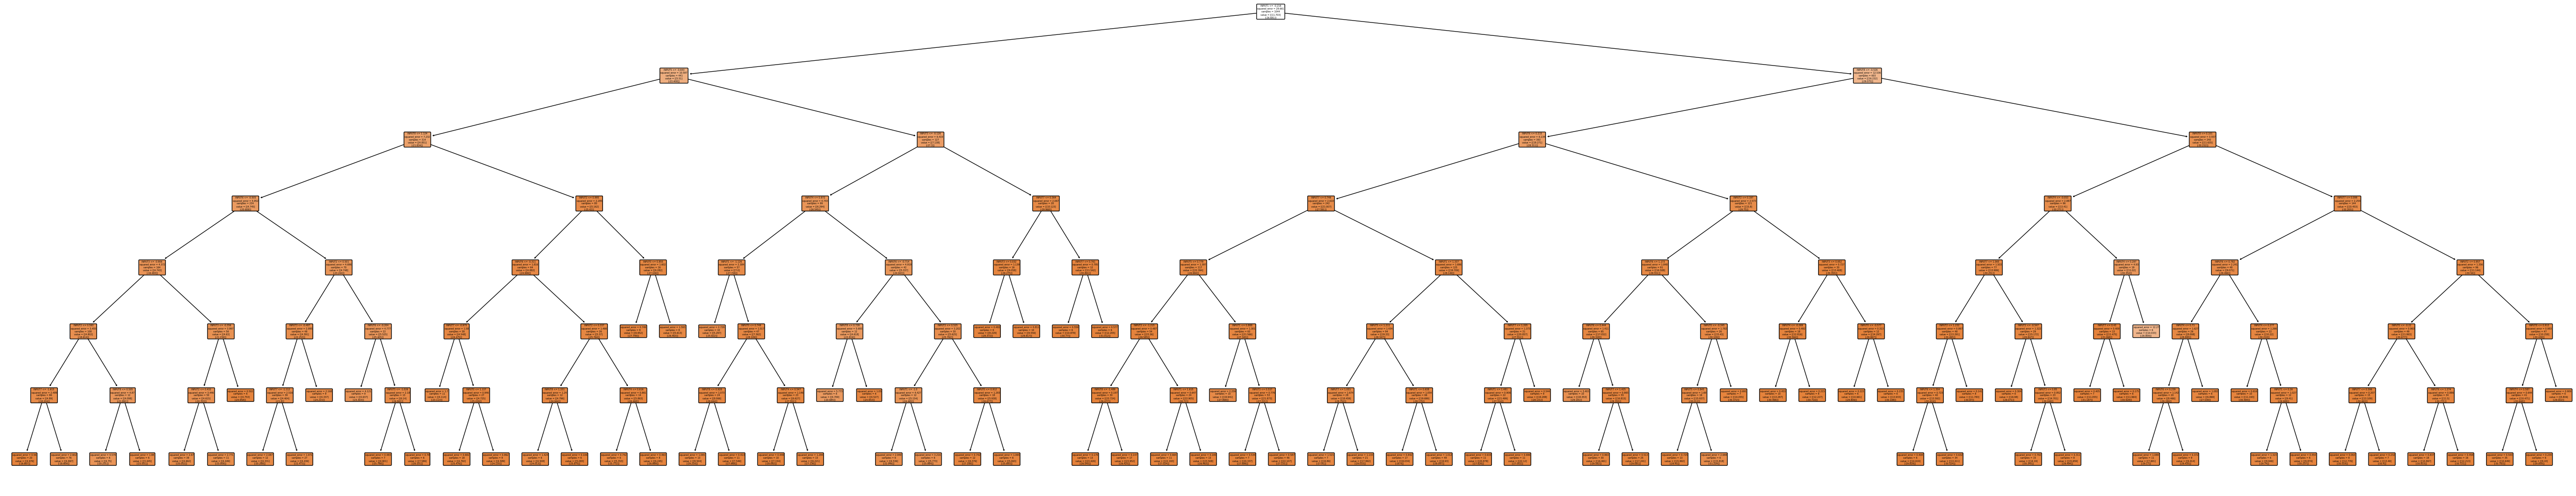

In [32]:
plt.figure(figsize=(50, 10))
tree.plot_tree(e_tree, 
               filled=True, rounded=True, 
               feature_names = ["INPUT0", "INPUT1", "INPUT2", "INPUT3", "INPUT4", "INPUT5", "INPUT6", "INPUT7", "INPUT8"])
plt.show()

In [33]:
train_pred_et = e_tree.predict(x_train)

In [34]:
print('MEE train set ', MEE(y_train, train_pred_et))

MEE train set  1.1847934538584666


In [35]:
test_pred_et = e_tree.predict(x_test)

In [36]:
print('MEE test set ', MEE(y_test, test_pred_et))

MEE test set  1.8216426811717366


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

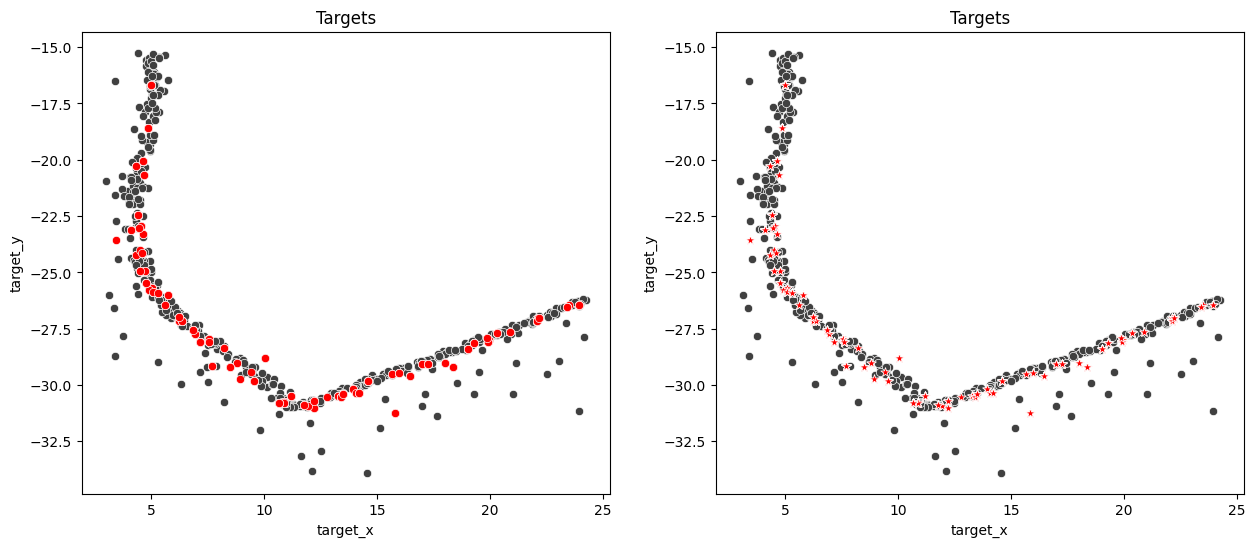

In [37]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_et[:,0],y=test_pred_et[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_et[:,0],y=test_pred_et[:,1],color='r',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

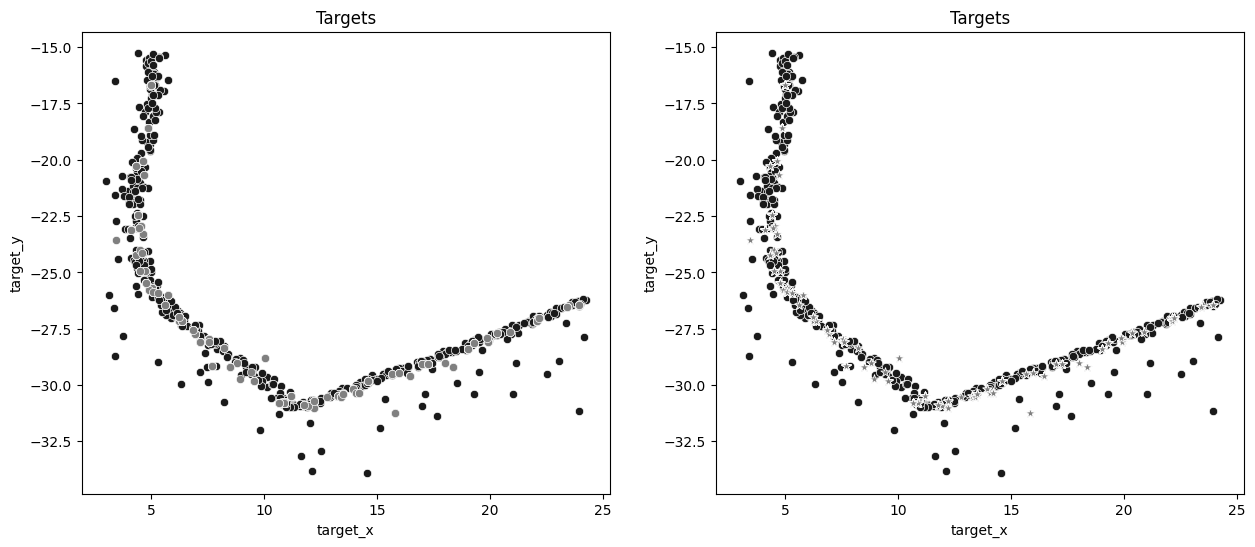

In [38]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_et[:,0],y=test_pred_et[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_et[:,0],y=test_pred_et[:,1],color='.5',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [39]:
results.append(('ExtraTreeRegressor train ', MEE(y_train, train_pred_et)))
results.append(('ExtraTreeRegressor validation ', et_cv.best_score_))

# Summary

In [40]:
for i in range(len(results)):
  print(results[i])

('DecisionTreeRegressor train ', 1.1847934538584666)
('DecisionTreeRegressor validation ', -1.7264068184067014)
('ExtraTreeRegressor train ', 1.1847934538584666)
('ExtraTreeRegressor validation ', -1.7264068184067014)
